## Final Project Submission

Please fill out:
* Student name: **Chelsea Power**
* Student pace: **part time**
* Scheduled project review date/time: **March 7, 2019 at 11 am ET**
* Instructor name: **Joe San Pietro**
* Blog post URL: **TBD**


## Phase 1: Understanding the Dataset

* Import the housing sale prices in King County, USA between the time period May 2014 - May 2015. 

In [1]:
#Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('kc_house_data.csv')

#Look at size of the dataset
df.shape

(21597, 21)

In [2]:
#Show first ten rows in DataFrame
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


### Variable definitions

* id - Unique ID for each home sold 
* date - Date of the home sale 
* price - Price of each home sold 
* bedrooms - Number of bedrooms 
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower 
* sqft_living - Square footage of the apartments interior living space 
* sqft_lot - Square footage of the land space 
* floors - Number of floors 
* waterfront - For whether the apartment was overlooking the waterfront or not 1’s represent a waterfront property, 0’s represent a non-waterfront property 
* view - An index from 0 to 4 of how good the view of the property was, 0 - lowest, 4 - highest 
* condition - An index from 1 to 5 on the condition of the apartment, 1 - lowest, 4 - highest 
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of * construction and design, and 11-13 have a high quality level of construction and design. 
* sqft_above - The square footage of the interior housing space that is above ground level 
* sqft_basement - The square footage of the interior housing space that is below ground level 
* yr_built - The year the house was initially built 
* yr_renovated - The year of the house’s last renovation 
* zipcode - What zipcode area the house is in 
* lat - Lattitude 
* long - Longitude 
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors 
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Phase 2: Scrubbing (Data Preparation)

* Detecting and deal with missing values
* Data type conversions (e.g. numeric data mistakenly encoded as objects/strings)
* Checking for and removing multicollinearity (correlated predictors)

In [3]:
# Checking the column types and entries per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
# Show total missing values by column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

* Replace null values for `waterfront`, `view` and `yr_renovated`

In [5]:
# Show unique values for waterfront column
df['waterfront'].unique()

array([nan,  0.,  1.])

In [6]:
# Replace null values with 0 rather than removing 2376 rows
# Waterfront is a category variable where 0 = no view and 1 = view
df['waterfront'].fillna(0, inplace=True)
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
# Show unique values for view column
df["view"].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [8]:
# Replace 63 null values with 0 to be equilivant to no view to onvert variable from a float to an int
# View is a categorical value
df['view'].fillna(0, inplace=True)
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
# Show unique values for yr_renovated column
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [10]:
# Replace null values with 0 so I can convert yr_renovated from a float to an int
df['yr_renovated'].fillna(0, inplace=True)
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Change types of the variables 

* Change objects to appropiate formats
* Make categorical variables

In [11]:
# Convert from object to datetime
df['date'] = df['date'].astype('datetime64[ns]')

# Convert from object to int64
df['yr_renovated'] = df['yr_renovated'].astype('int64')

# Make categorical variables
df["waterfront"] = df["waterfront"].astype('category')
df["condition"] = df["condition"].astype('category')
df["view"] = df["view"].astype('category')
df["grade"] = df["grade"].astype('category')

# Convert sqft_basement from object to float
df['sqft_basement'] = pd.to_numeric(df["sqft_basement"], errors = 'coerce').fillna(0, downcast='infer')

## Summary

* All columns have missing values removed and have been set to the correct type
* Will not be considering the means and std values for categorical (`waterfront`, `view`, `condition` and `grade`) and datetime (`date`) variables
* Will not be considering the means and std values for `id`, `zipcode`, `lat`, `long` columns
* Create heatmap to identify most important features and explore the intercorrelation between features

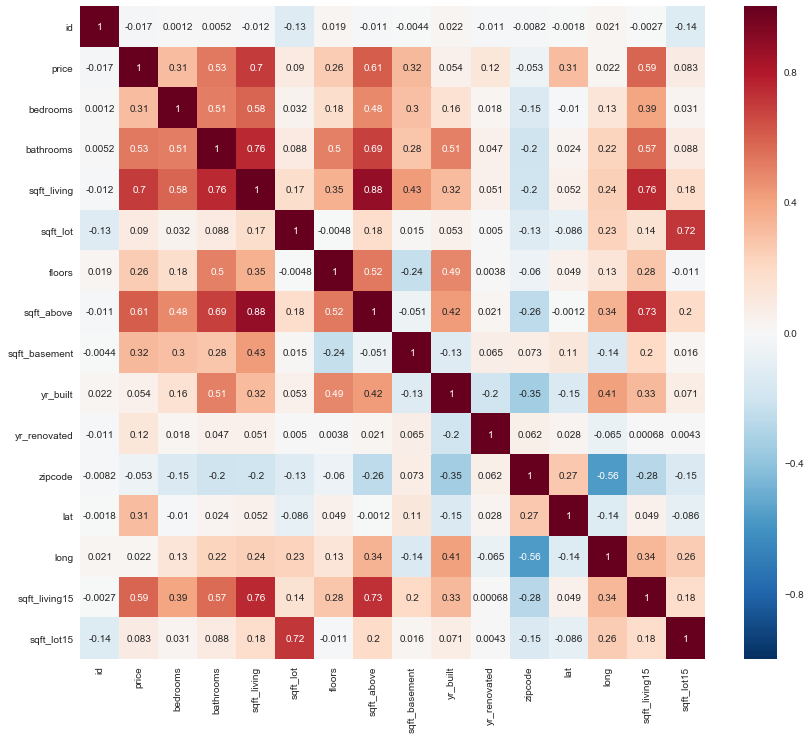

In [12]:
#Create coorelation heatmap
correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

## Heatmap Summary

* Multicolinarity is high for: `bathrooms`, `sqft_living`, `sqft_above`, and `sqft_living15`. These are good candidates to be removed.
* `ID` should be removed.

In [13]:
# Remove ID
df_pred = df.drop(['id'], axis=1)

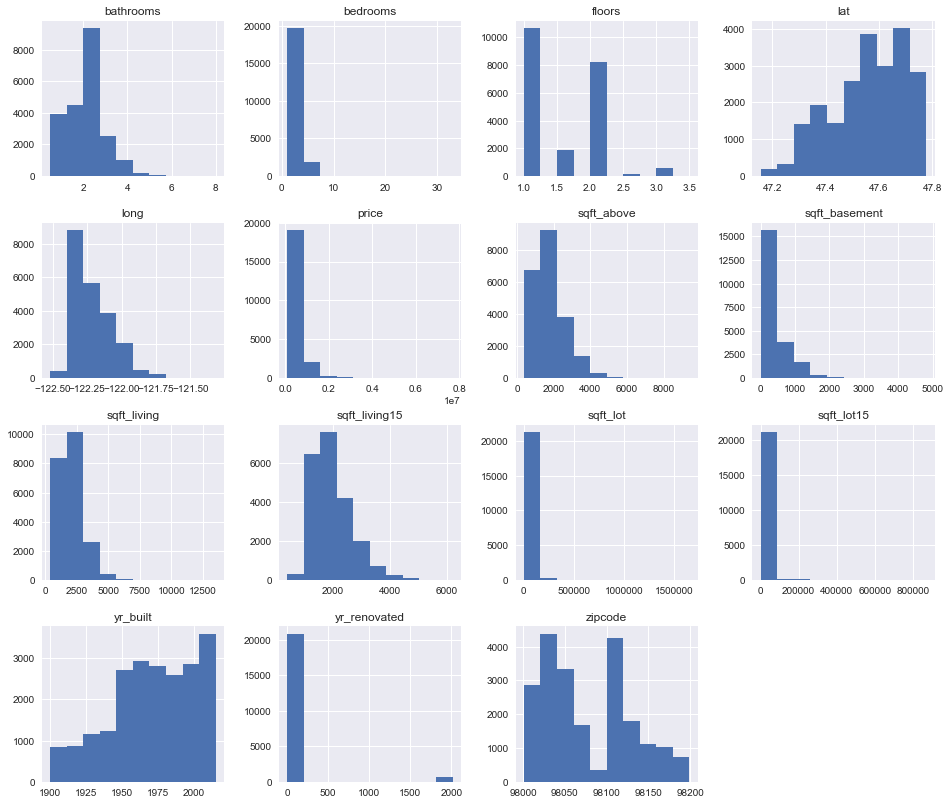

In [14]:
# Look at histograms for all columns
df_pred.hist(figsize = [16, 14]);

### Summary

* There are some obvious outliers in `bedrooms`, `bathrooms`, `sqft_basement`, `sqft_lot`, and `sqft_lot15` columns 
* Drop rows `bedrooms` to only include bedrooms 5 or less
* Drop rows `bathrooms` to only include bedrooms between 0 and 4
* Drop rows `sqft_above` to only include less than 4,000
* Drop rows `sqft_living` to only include less than 4,000
* Drop rows `sqft_living15` to only include less than 4,000
* Drop rows `sqft_lot` to only include less than 30,000
* Drop rows `sqft_lot15` to only include less than 20,000
* After dropping rows, show histogram again

In [15]:
# Filter bedrooms 5 or less
df_pred.drop(df_pred[ df_pred['bedrooms'] > 5 ].index, inplace=True)

# Filter bathrooms 0 to 4
df_pred.drop(df_pred[ (df_pred['bathrooms'] <= 0) & (df_pred['bathrooms'] >= 4) ].index, inplace=True)

# Filter sqft_above size 4,000 or less
df_pred.drop(df_pred[ df_pred['sqft_above'] > 4000 ].index, inplace=True)

# Filter sqft_basement size l,000 or less
df_pred.drop(df_pred[ df_pred['sqft_basement'] > 1000 ].index, inplace=True)

# Filter sqft_living size 4,000 or less
df_pred.drop(df_pred[ df_pred['sqft_living'] > 4000 ].index, inplace=True)

# Filter sqft_living15 size 4,000 or less
df_pred.drop(df_pred[ df_pred['sqft_living15'] > 4000 ].index, inplace=True)

# Filter sqft_lot size 30,000 or less
df_pred.drop(df_pred[ df_pred['sqft_lot'] > 30000 ].index, inplace=True)

# Filter sqft_lot15 size 20,000 or less
df_pred.drop(df_pred[ df_pred['sqft_lot15'] > 20000 ].index, inplace=True)

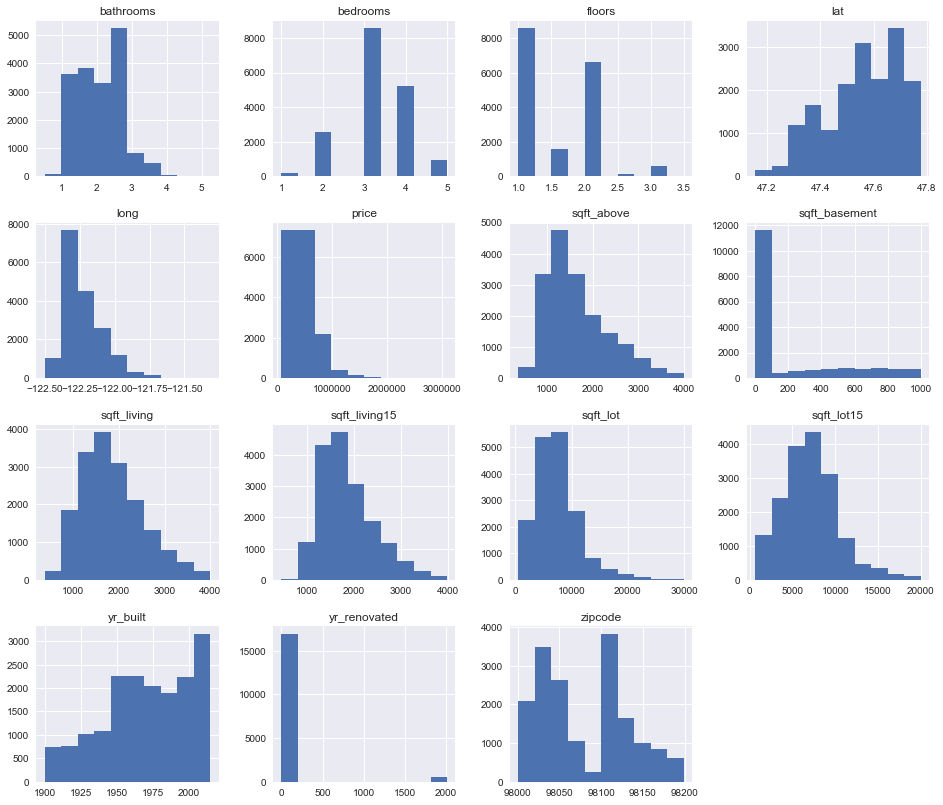

In [10]:
# Show histogram again with dropped outliners
df_pred.hist(figsize = [16, 14]);

## Phase 3: Exploring

* Log transform variables
* Cannot log transform `sqft_basement` since there are 303 rows of 0's in this column

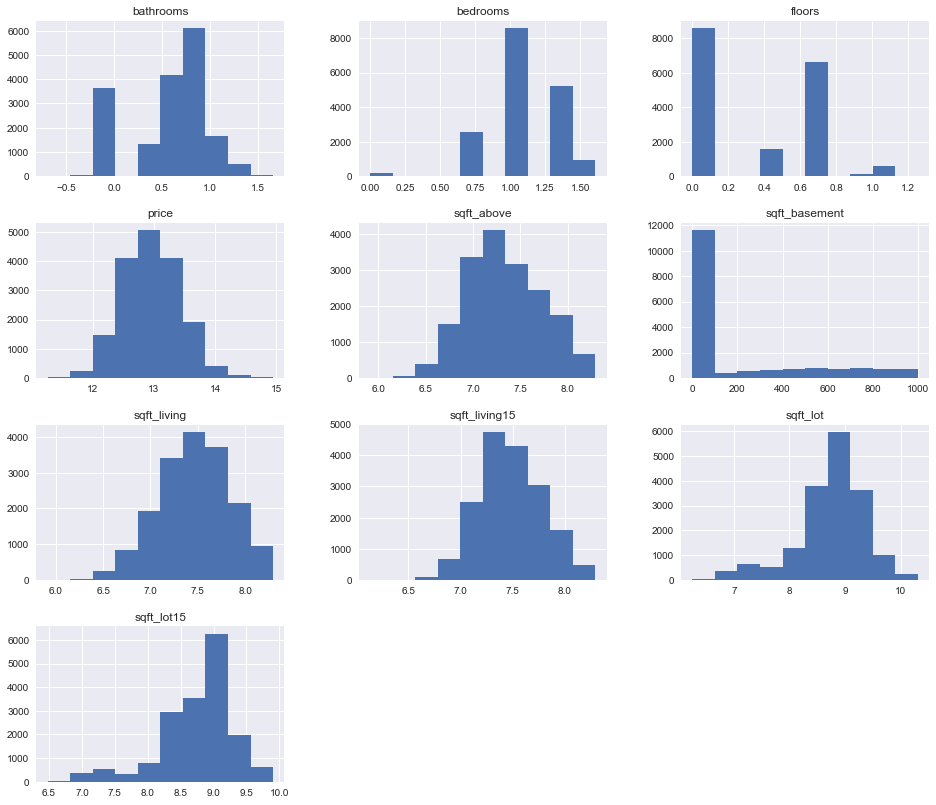

In [16]:
# Log transform variables
df_log= pd.DataFrame([])
df_log["bedrooms"] = np.log(df_pred["bedrooms"])
df_log["bathrooms"] = np.log(df_pred["bathrooms"])
df_log["floors"] = np.log(df_pred["floors"])
df_log["price"] = np.log(df_pred["price"])
df_log["sqft_above"] = np.log(df_pred["sqft_above"])
#sqft_basement variable is not log transformed because it has 0's in it
df_log["sqft_basement"] = df_pred["sqft_basement"] 
df_log["sqft_living"] = np.log(df_pred["sqft_living"])
df_log["sqft_living15"] = np.log(df_pred["sqft_living15"])
df_log["sqft_lot"] = np.log(df_pred["sqft_lot"])
df_log["sqft_lot15"] = np.log(df_pred["sqft_lot15"])
df_log.hist(figsize  = [16, 14]);

## Phase 4: Modeling

* Create OLS Model get R-squared & P-values
* Compare continuous features to categorical
* Conduct recrussive feature elimination
* Train/Test Split
* 10-fold cross validation

In [18]:
# Ordinary Least Squares
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Runs OLS regression between (continuous) independent and dependent variables
col_names = df_log.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("")
    print ("King County Houses: Price~" + val)
    print ("------------------------------")
    f = 'price~' + val
    model = smf.ols(formula=f, data=df_log).fit()
    X_new = pd.DataFrame({val: [df_log[val].min(), df_log[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])


King County Houses: Price~bedrooms
------------------------------
['bedrooms', 0.0806234292858885, 12.394771403536812, 0.4963346086457333, 0.0]

King County Houses: Price~bathrooms
------------------------------
['bathrooms', 0.1921217929908393, 12.62220027659361, 0.5409007206933749, 0.0]

King County Houses: Price~floors
------------------------------
['floors', 0.11195033163925228, 12.809575644895205, 0.44522594054508247, 0.0]

King County Houses: Price~sqft_above
------------------------------
['sqft_above', 0.2548722404073118, 8.554513269103843, 0.6008950704972237, 0.0]

King County Houses: Price~sqft_basement
------------------------------
['sqft_basement', 0.03786169653341476, 12.90338058624314, 0.00029946164250197545, 1.5127876612566958e-148]

King County Houses: Price~sqft_living
------------------------------
['sqft_living', 0.34591997871151914, 7.465723849623098, 0.7368624445727163, 0.0]

King County Houses: Price~sqft_living15
------------------------------
['sqft_living15'

In [19]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0806234,12.3948,0.496335,0
2,bathrooms,0.192122,12.6222,0.540901,0
3,floors,0.11195,12.8096,0.445226,0
4,sqft_above,0.254872,8.55451,0.600895,0
5,sqft_basement,0.0378617,12.9034,0.000299462,1.51279e-148
6,sqft_living,0.34592,7.46572,0.736862,0
7,sqft_living15,0.283953,6.68936,0.838399,0
8,sqft_lot,0.00165111,13.2308,-0.0308126,7.83495e-08
9,sqft_lot15,0.0023009,13.3163,-0.0405877,2.27856e-10


### Results

* `bathrooms`, `floors`, `sqft_above`, `sqft_living` and `sqft_living15` should be removed based on R-squared values.
* NOTE: `bathrooms`, `sqft_above`, `sqft_living` and `sqft_living15` also showed multicolinarity in the heatmap above
* After removing these variables, run OLS again

In [20]:
df_log2 = df_log.drop(['bathrooms', 'floors','sqft_above', 'sqft_living', 'sqft_living15'], axis=1)
df_log2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17459 entries, 0 to 21596
Data columns (total 5 columns):
bedrooms         17459 non-null float64
price            17459 non-null float64
sqft_basement    17459 non-null int64
sqft_lot         17459 non-null float64
sqft_lot15       17459 non-null float64
dtypes: float64(4), int64(1)
memory usage: 818.4 KB


In [21]:
# Run OLS a second time
col_names = df_log2.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("")
    print ("King County Houses: Price~" + val)
    print ("------------------------------")
    f = 'price~' + val
    model = smf.ols(formula=f, data=df_log2).fit()
    X_new = pd.DataFrame({val: [df_log2[val].min(), df_log2[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])


King County Houses: Price~bedrooms
------------------------------
['bedrooms', 0.0806234292858885, 12.394771403536812, 0.4963346086457333, 0.0]

King County Houses: Price~sqft_basement
------------------------------
['sqft_basement', 0.03786169653341476, 12.90338058624314, 0.00029946164250197545, 1.5127876612566958e-148]

King County Houses: Price~sqft_lot
------------------------------
['sqft_lot', 0.0016511114397889104, 13.230807513693538, -0.03081255056892207, 7.83494581037045e-08]

King County Houses: Price~sqft_lot15
------------------------------
['sqft_lot15', 0.002300897884127129, 13.31630286249531, -0.04058770029498859, 2.2785562028881606e-10]


In [22]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0806234,12.3948,0.496335,0
2,sqft_basement,0.0378617,12.9034,0.000299462,1.51279e-148
3,sqft_lot,0.00165111,13.2308,-0.0308126,7.83495e-08
4,sqft_lot15,0.0023009,13.3163,-0.0405877,2.27856e-10


### Results

* `bedrooms` and `sqft_basement` look like good predictors for housing `price`

### Build a model with each categorical variable as a predictor

* Create a new dataset with "One Hot Encoded" categories
* Run against log transformed and regular `price`
* Use the 4 categorical variables: `waterfront`, `view`, `condition`, and `grade`

In [23]:
# Create new data set with only price and the category variables
df_categories = df_pred.drop(['date','bedrooms','bathrooms','sqft_living',
                                 'sqft_lot','floors','sqft_above','sqft_basement',
                                 'yr_built', 'yr_renovated','zipcode','lat', 'long',
                             'sqft_living15', 'sqft_lot15'], axis=1)

In [24]:
# One Hot Encode the category data set
one_hot_df = pd.get_dummies(df_categories)
one_hot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17459 entries, 0 to 21596
Data columns (total 24 columns):
price             17459 non-null float64
waterfront_0.0    17459 non-null uint8
waterfront_1.0    17459 non-null uint8
view_0.0          17459 non-null uint8
view_1.0          17459 non-null uint8
view_2.0          17459 non-null uint8
view_3.0          17459 non-null uint8
view_4.0          17459 non-null uint8
condition_1       17459 non-null uint8
condition_2       17459 non-null uint8
condition_3       17459 non-null uint8
condition_4       17459 non-null uint8
condition_5       17459 non-null uint8
grade_3           17459 non-null uint8
grade_4           17459 non-null uint8
grade_5           17459 non-null uint8
grade_6           17459 non-null uint8
grade_7           17459 non-null uint8
grade_8           17459 non-null uint8
grade_9           17459 non-null uint8
grade_10          17459 non-null uint8
grade_11          17459 non-null uint8
grade_12          17459 non-nul

In [25]:
# Rename the columns / remove the ".0"
one_hot_df.columns = ['price','waterfront0','waterfront1','view0',
                     'view1','view2','view3','view4','condition1',
                     'condition2','condition3','condition4','condition5',
                     'grade3','grade4','grade5','grade6','grade7','grade8',
                     'grade9','grade10','grade11','grade12','grade13',]
one_hot_df.head()

,price,waterfront0,waterfront1,view0,view1,view2,view3,view4,condition1,condition2,...,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,grade13
0,221900.0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,538000.0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,180000.0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Categorical Variable Model with regular price

In [26]:
# Using regular price
cols_waterfront = one_hot_df.columns[1:2]
cols_view = one_hot_df.columns[3:7]
cols_condition = one_hot_df.columns[8:12]
cols_grade = one_hot_df.columns[13:24] 

cols = [cols_waterfront, cols_view, cols_condition, cols_grade]
for col in cols:
    sum_cols = "+".join(col)
    form = "price~" + sum_cols
    model = smf.ols(formula= form, data=one_hot_df).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     378.7
Date:                Fri, 08 Mar 2019   Prob (F-statistic):           1.83e-83
Time:                        11:57:35   Log-Likelihood:            -2.4154e+05
No. Observations:               17459   AIC:                         4.831e+05
Df Residuals:                   17457   BIC:                         4.831e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.184e+06   3.64e+04     32.552      

/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


### Results

* `Regular price` against `waterfront` shows a low .02 (or 2%) r-squared value with a 0 p-value
* `Regular price` against `view` shows a low .09 (or 9%) r-squared value with a 0 p-value
* `Regular price` against `condition` shows a low .01 (or 1%) r-squared value with a 0 p-value
* `Regular price` against `grade` shows a high .41 (or 41%) r-squared value with a 0.2 p-value

In [27]:
# Create new DataFrame with log transformed price and categorical variables
df_log_cat = pd.DataFrame([])
df_log_cat["price"] = np.log(df_pred["price"])
df_log_cat["waterfront"] = df_pred["waterfront"]
df_log_cat["view"] = df_pred["view"]
df_log_cat["condition"] = df_pred["condition"]
df_log_cat["grade"] = df_pred["grade"]

In [28]:
# One Hot Encode the new category data set
one_hot_df_log = pd.get_dummies(df_log_cat)
one_hot_df_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17459 entries, 0 to 21596
Data columns (total 24 columns):
price             17459 non-null float64
waterfront_0.0    17459 non-null uint8
waterfront_1.0    17459 non-null uint8
view_0.0          17459 non-null uint8
view_1.0          17459 non-null uint8
view_2.0          17459 non-null uint8
view_3.0          17459 non-null uint8
view_4.0          17459 non-null uint8
condition_1       17459 non-null uint8
condition_2       17459 non-null uint8
condition_3       17459 non-null uint8
condition_4       17459 non-null uint8
condition_5       17459 non-null uint8
grade_3           17459 non-null uint8
grade_4           17459 non-null uint8
grade_5           17459 non-null uint8
grade_6           17459 non-null uint8
grade_7           17459 non-null uint8
grade_8           17459 non-null uint8
grade_9           17459 non-null uint8
grade_10          17459 non-null uint8
grade_11          17459 non-null uint8
grade_12          17459 non-nul

In [29]:
# Rename the columns / remove the ".0"
one_hot_df_log.columns = ['price','waterfront0','waterfront1','view0',
                     'view1','view2','view3','view4','condition1',
                     'condition2','condition3','condition4','condition5',
                     'grade3','grade4','grade5','grade6','grade7','grade8',
                     'grade9','grade10','grade11','grade12','grade13',]
one_hot_df_log.head()

,price,waterfront0,waterfront1,view0,view1,view2,view3,view4,condition1,condition2,...,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,grade13
0,12.309982,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,13.195614,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,12.100712,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,13.311329,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,13.142166,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Categorical Variable Model with log transformed price

In [30]:
# Using log transformed price
cols_waterfront = one_hot_df_log.columns[1:2]
cols_view = one_hot_df_log.columns[3:7]
cols_condition = one_hot_df_log.columns[8:12]
cols_grade = one_hot_df_log.columns[13:24] 

cols = [cols_waterfront, cols_view, cols_condition, cols_grade]
for col in cols:
    sum_cols = "+".join(col)
    form = "price~" + sum_cols
    model = smf.ols(formula= form, data=one_hot_df_log).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 08 Mar 2019   Prob (F-statistic):           1.21e-38
Time:                        11:57:45   Log-Likelihood:                -11576.
No. Observations:               17459   AIC:                         2.316e+04
Df Residuals:                   17457   BIC:                         2.317e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.8627      0.069    200.205      

/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


### Results

* `Log transformed price` against `waterfront` shows a low .01 (or 1%) r-squared value with a 0 p-value
* `Log transformed price` against `view` shows a low .06 (or 6%) r-squared value with a 0 p-value
* `Log transformed price` against `condition` shows a low .01 (or 1%) r-squared value with a 0 p-value
* `Log transformed price` against `grade` shows a high .40 (or 40%) r-squared value with a 0.08 p-value

## Recrussive feature elimination (RFE)

* Scale all features to be on the same 0 to 1 scale
* Create a for loop using RFE where we look at the best features to be selected according to the feature ranking algorithm. 

In [116]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

#Look at the one best feature against log transformed dataset
selector = RFE(linreg, n_features_to_select=1)
Y = df_log['price']
X = df_log.drop('price', axis=1)
selector = selector.fit(X, Y)

In [117]:
selector.ranking_

array([3, 6, 8, 5, 9, 1, 2, 7, 4])

In [118]:
#Best feature is sqft_living and sqft_living15
X.columns

Index(['bedrooms', 'bathrooms', 'floors', 'sqft_above', 'sqft_basement',
       'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15'],
      dtype='object')

In [119]:
no_scale = selector.ranking_

In [120]:
# Scale all features to be on the same 0 to 1 scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X2)
scaled_data = scaler.transform(X)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [121]:
selector = selector.fit(scaled_data, Y)

In [122]:
selector.ranking_

array([7, 8, 9, 2, 4, 6, 1, 3, 5])

In [123]:
X.columns

Index(['bedrooms', 'bathrooms', 'floors', 'sqft_above', 'sqft_basement',
       'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15'],
      dtype='object')

In [124]:
scaled_data = selector.ranking_

In [125]:
features = pd.DataFrame({'Columns': X.columns,
                        'Not scaled': no_scale,
                        'Scaled': scaled_data})
features

,Columns,Not scaled,Scaled
0,bedrooms,3,7
1,bathrooms,6,8
2,floors,8,9
3,sqft_above,5,2
4,sqft_basement,9,4
5,sqft_living,1,6
6,sqft_living15,2,1
7,sqft_lot,7,3
8,sqft_lot15,4,5


Text(0, 0.5, 'Feature Importance')

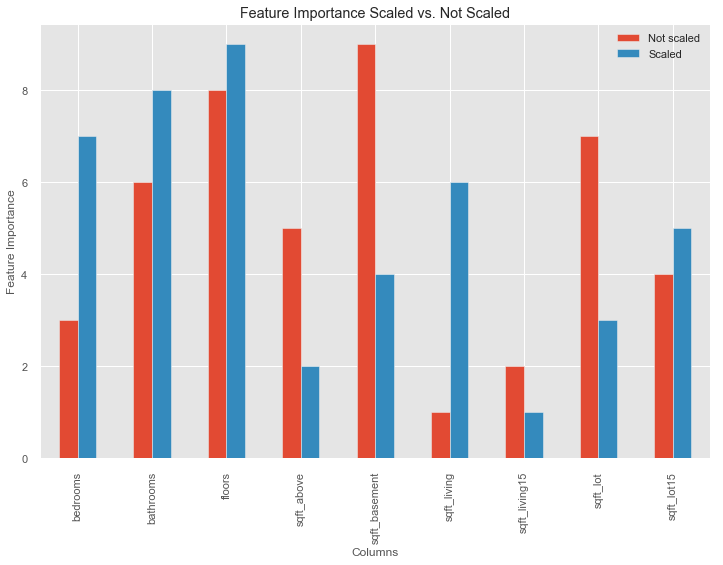

In [110]:
plt.style.use('ggplot')
ax = features.set_index('Columns').plot(kind='bar', figsize=(12,8))
ax.set_title('Feature Importance Scaled vs. Not Scaled')
ax.set_ylabel('Feature Importance')

### Results

* When unscaled, the most important feature is `sqft_living`
* When scaled, the most important feature is `sqft_lot`

## Train/Test Split

* Use a train test split of 20-80
* Looking at MSE for train and test

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(5,86,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)

price    0.197859
dtype: float64
price    0.192898
dtype: float64
price    0.197859
dtype: float64
price    0.192898
dtype: float64
price    0.197859
dtype: float64
price    0.192898
dtype: float64
price    0.197859
dtype: float64
price    0.192898
dtype: float64
price    0.197859
dtype: float64
price    0.192898
dtype: float64
price    0.197859
dtype: float64
price    0.192898
dtype: float64
price    0.197859
dtype: float64
price    0.192898
dtype: float64
price    0.197859
dtype: float64
price    0.192898
dtype: float64
price    0.197859
dtype: float64
price    0.192898
dtype: float64


In [42]:
mse_train = mean_squared_error(y_train, yhat_train)
mse_train

0.19785911766672093

In [43]:
mse_test = mean_squared_error(y_test, yhat_test)
mse_test

0.1928978511455985

## 10-fold cross validation with the final model

* Store the (negative) MSEs

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# select best predictors

select_85 = RFE(linreg, n_features_to_select = 85)
select_85 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

array([-0.19120403, -0.21284126, -0.19749436, -0.20166783, -0.19579267,
       -0.19755779, -0.207432  , -0.20748232, -0.20133461, -0.16080888])

In [80]:
np.mean(cv_10_results)

-0.19736157522194836

## Phase 5: Interpert

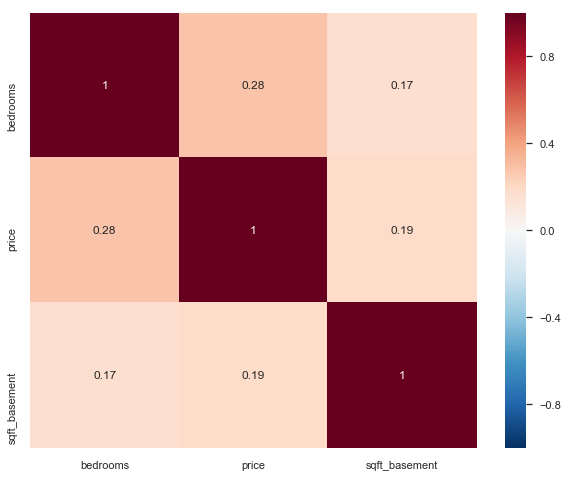

In [47]:
correlation = df_log3.corr()
plt.figure(figsize=(10, 8))
heatmap_final = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

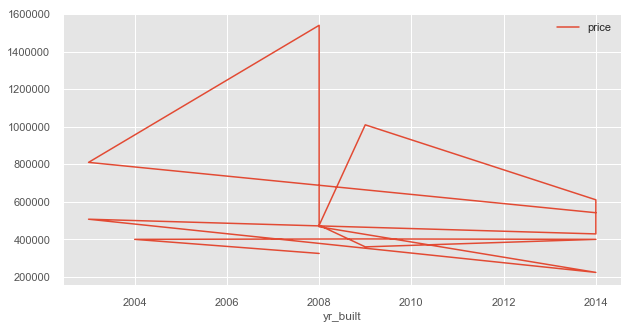

In [135]:
df[-15:].plot(x='yr_built', y='price', figsize=(10,5), grid=True)